# Music and Lyrics: A Dialect for Perspective

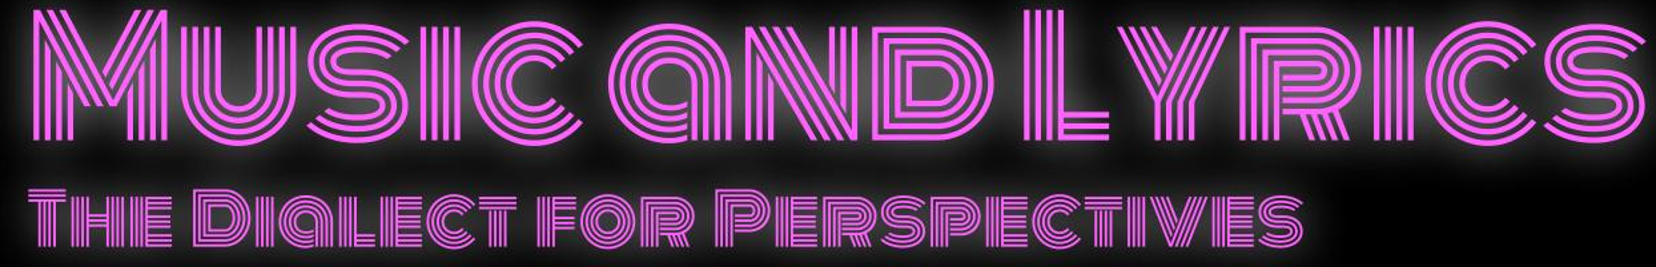

In [10]:
display(Image('outputs/music_and_lyrics.PNG'))

## Executive Summary

<p style="text-align:justify">
As one of the universal cultural aspects of human societies, music seems magical in how it can relate and resonate with us on a visceral level. In fact, music is so powerful in evoking emotions and connecting with people that it has become a multi-billion dollar industry today.
<br><br>
Each song has a story to tell, so we asked: What are the underlying themes of music genres based on song lyrics? To answer this, we extracted around 300 hundred songs for the genres of pop, rock, heavy metal, country, RnB and Hiphop using the Spotify Recommendation API. The lyrics for the songs were then web scraped from AZLyrics.com Important words and terms were identified using TF-IDF vectorizer which were then used as the basis for k-means clustering. We then applied latent semantic analysis to find and interpret the general lyrical themes within each cluster.
<br><br>
Results show that lyrical compositions tell many different kinds of stories. However, we did find that they gravitated towards the common themes of partying, pleasure, sorrow, and love. We also find that lyrics reflect the prevalent cultural and social situation at the time the song was written. By comparing the clusters of songs from the 1990s with those from the 2020s, we observed that song lyrics nowadays trend towards more mature and hedonistic themes. We believe this is because society in general has become more open in discussing topics which were deemed taboo in the past such as alcohol, drugs, and other vices.
<br><br>
Our analysis and assumptions of the latent factors were guided by the known contexts of cluster genres. However, the study could be greatly improved by taking into account figures of speech and the symbolisms prevalent in lyrical art forms. The study can serve as the foundation for a message-based recommender system. In this case, recommendations and generated playlist would no longer be confined to genres, but to a much wider scope based on granular themes and messages that transcend genres. As an example, this study can help businesses like cafes or bars easily create playlists that suit the mood of their place's ambience, theme or their target customers. For songwriters, the study can help them discover what other topics they can explore or how they can create something new or fresh in their existing genres.</p>

## I. Introduction

<p style="text-align:justify"> Music is the art of arranging sounds in time to produce a composition through the elements of melody, harmony, rhythm, and timbre.$^1$ As one of the universal cultural aspects of all human societies, music seems magical in how it can relate and resonate with us on a visceral level. In fact, music is such a powerful catalyst that reactions range from humming along, to shedding tears and even, inspiring movement (physical and social). It is this power of music to evoke emotions and connect to people that has made it into the multi-billion dollar industry it is today.</p>
<p style="text-align:justify">Lyrics got its origins from the Greek word λυρικός (lurikós), which translates to "words set to music".$^2$ Besides the melody, harmony, rhythm or timbre, the lyrics is another main way of communicating the message that the artist wanted to convey. Lyrics, when partnered with music elements and presented in a rhythmic and melodic manner, are part of music.$^3$ Artists, whose songs have stood the test of time, extended their talent, intention, passion and hard work to create the perfect mix of resonant voice, meaningful lyrics and soothing music.$^4$</p>

### *Problem Statement*
<p style="text-align:justify">What are the underlying themes of music genres based on song lyrics?</p>


### *Motivation*
<p style="text-align:justify">Songs are classified by music genre which is commonly identified through similar patterns of audio features. More than a composition of audio features, songs are an art form of expressing emotions as manifested in the lyrics. 
<br><br>Songwriters/artists express their perceptions and experiences on the prevalent social situations at the time of writing. The songs composed resonate with audiences who have a shared experience or who can somehow relate to the message of the song.
<br><br>With these in mind, the group would like to cluster song lyrics gathered into sub-genres under each music genre considered for the study, and analyze them to interpret the story being told per cluster which often relates to a certain event or perspective.</p>

In [6]:
from music_functions import *

# Import libraries
import IPython
from IPython.core.display import HTML, Image
import base64
import datetime as datetime
import time
import re
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
import matplotlib.patches as mpatches
import unidecode
import pandas as pd
import sqlite3

import requests
from urllib.parse import urlencode
from bs4 import BeautifulSoup

from tqdm import tqdm
tqdm.pandas()

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import euclidean, cityblock
from scipy.spatial.distance import cosine
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import TruncatedSVD
from matplotlib import cm 

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
# Download nltk requirements
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')

from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import calinski_harabasz_score, silhouette_score
from sklearn.cluster import KMeans
# from pyclustering.cluster.kmedians import kmedians
from scipy.spatial.distance import euclidean
from sklearn.base import clone

proxies = {
  'http': 'http://206.189.157.23',
  'https': 'http://206.189.157.23',
}

HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

import re
from nltk.corpus import stopwords
import nltk|

In [3]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## II. Methodology

Functions used to perform the study are stored in the <code>music_functions.py</code> file for notebook brevity. 
Classes and functions contained therein are:

| Name | Type | Description |
| :-- | :--: | :---------- |
| `Preprocess` | Class | Contains all functions for word processing including `filter_words` for cleaning and  `vectorize` for TF-IDF vectorization. |
| `pooled_within_ssd` | Function | Computes pooled within-cluster sum of squares around the cluster mean. |
| `gap_statistic` | Function | Computes for the gap statistic given the design matrix and its centroids. |
| `cluster_range` | Function | Clusters the input matrix given the clusterer and the k range. Also provides the internal validation scores. |
| `plot_cluster` | Function | Plots clusters given the design matrix and cluster labels. |
| `plot_internal` | Function | Plots internal validation scores from the `cluster_range` function. |
| `clusters` | Function | Clusters the input array into k clusters using K-means.
| `lsa` | Function | Performs LSA on the input TF-IDF matrix. |
| `lsa_word_cloud` | Function | Generates word clouds for the LSA results. |
| `over_time` | Function | Plots over time changes for each cluster.


The methodology used in performing the analysis is outlined below:

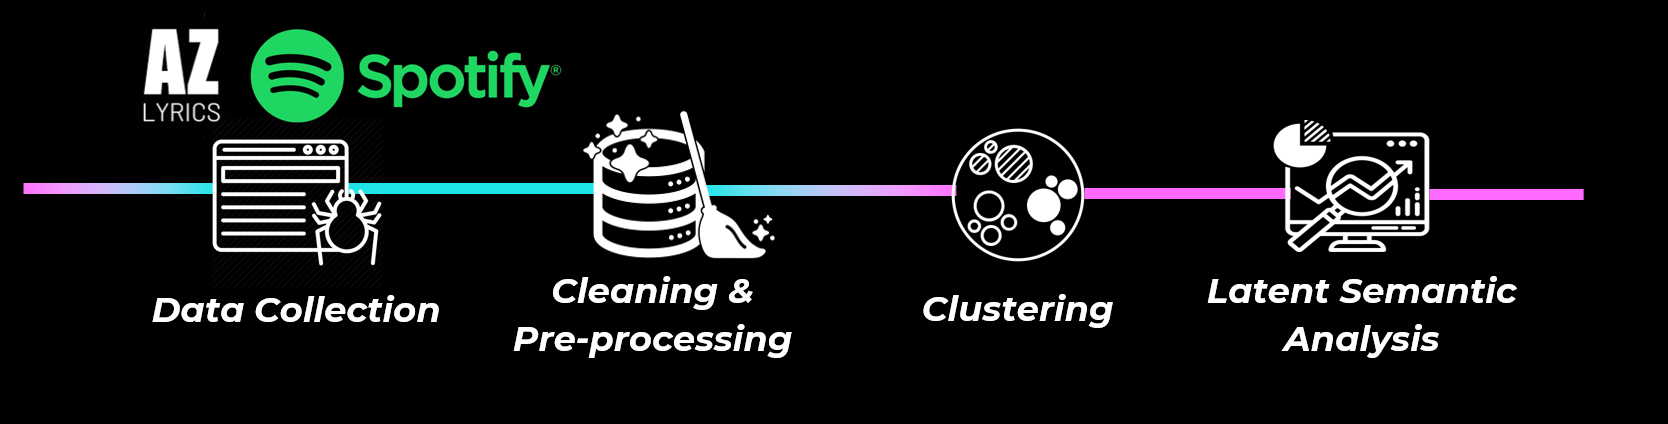

In [7]:
display(Image('outputs/methodology.PNG'))

#### A. Data Collection

Below are the steps used in data collection:

<div style="margin-left: 1em;">
<b><i><br>1. Use Spotify’s Recommendation API to extract three hundred songs for each genre</i></b><br>
The Spotify API has a Recommendation feature which allows retrieval of song titles along with their artists given some specific features as filters. The genres considered for analysis are Pop, Rock, RnB, Hiphop, Country, and Heavy Metal. To limit the results to specific genres, the <code>seed_genres</code> attribute was used. In addition, the <code>seed_tracks</code> attribute was used to enable analysis of changes in clusters over time. Song eras were controlled by using seed songs from two groups: early-to-mid 90s titles and recently released songs (2020-2021). This may not be a perfect solution considering that Spotify has a tendency to recommend songs from a wider release period (e.g. mid-2000s songs can be recommended in either group). However, this was the best possible measure given the API limitations. In total, some 400 songs (200 per era) for each genre were extracted to enable some allowance in case some songs lyrics prove to be unextractable.

<b><i>2. Perform web scraping on the AZ lyrics website to extract song lyrics</i></b><br>
Lyrics for the songs extracted from the Spotify API were then obtained by webscraping AZLyrics. To enable this, song and artist strings were first cleaned (e.g. replacement of accented letters, conversion of '$' to 's', etc.) to allow searchability.
</div>

#### B. Cleaning & Pre-Processing

To enable effective analysis, the lyrics were first pre-processed to retain the most useful words. This involved the steps below:

<div style="margin-left: 1em;">
    <b><i><br>1. Cleaning</i></b><br>
    Unnecessary words were first removed using a variety of techniques including:
    <div style="margin-left: 1em;">
        i. Conversion of all characters to lower case.<br>
        ii. Removal of punctuation marks.<br>
        iii. Removal of filler words like "yeah", "huh", "ooh", "ayy", etc.<br>
        iv. Removal of English, French, and Spanish stopwords using <code>nltk.corpus.stopwords</code>.<br>
        v. Lemmatization using <code>nltk.stem.WordNetLemmatizer to group words with similar meanings</code>.<br>
    </div>
    <b><i><br>2. TF-IDF Vectorization</i></b><br>
    The <code>TfidfVectorizer</code> from the <code>sklearn</code> was used to vectorize the cleaned lyrics and assign importance values to each of the words. An <code>ngram_range</code> of 2 was used to also allow detection of the most common two-word phrases. Also, to filter out some of the more common words that do not bring value to the analysis, a <code>max_df</code> value of 0.8 was used, effectively removing all words that appear in more than 80% of the songs.

</div>

#### C. Clustering
K-Means was used in clustering the songs into different sub-genres having varying themes. This method was chosen not only because it allowed the most even distribution across the clusters, but also because it created the most interpretable splits. The best number of clusters for each genre was chosen using internal validation scores like sum of squared distance, Calinski-Harabasz, Silhouette Score, and Gap Statistic.

#### D. Interpretation of Clusters using Latent Semantic Analysis (LSA)

To maximize interpretability, LSA was first performed on the vectorized data to surface the most common similarities between the songs within clusters. Word clouds were then generated from the LSA output to enable visualization of the resulting weights for each word. This allowed exploration of general topics for each cluster based on song lyrics by identifying words related to each other and inferring the main topics based on weights of the words/group of words

Each of the steps outlined are discussed in detail in the succeeding sections.

## III. Data Processing

In this section, we will be pre-processing the data to clean and align the datasets used and load them to sql database

<b>i. Extract song <code>title</code>, <code>artist</code>, and <code>era</code> for each of the chosen genres through Spotify's Recommendation api</b>

In getting the features that we wanted,  we need the following required parameters:
<ul>
    <li> Access token </li>
    <li> Seed genres </li>
    <li> Seed track id </li>
</ul>
<p style="text-align:justify">First, we performed authentication using client ID and client secret that can be found on <a href="https://developer.spotify.com/">https://developer.spotify.com/</a> in order for us to get an <code>access_token</code>. </p>

In [2]:
def perform_auth_spotify(client_id, client_secret):
    """ Authenticate user's account; expires every 1 hr

    Parameters
    ----------
    client_id       : str
                      client id string
    client_secret   : str
                      client secret string

    Returns
    --------
    access_token    : str
                      access token string
    """
    client_creds = base64.b64encode(f'{client_id}:{client_secret}'.encode())

    resp = requests.post(
        'https://accounts.spotify.com/api/token',
        data={
            'grant_type': 'client_credentials'
        },
        headers={
            'Authorization': f'Basic {client_creds.decode()}'
        }
    )

    if resp.status_code == 200:
        resp_data = resp.json()
        access_token = resp_data['access_token']
        print('Authentication Success!')
    else:
        raise Exception('Authentication Failed!')

    return access_token

In [ ]:
# Authenticate user
if os.path.exists('credentials.txt'):
    with open('credentials.txt', 'r') as f:
        client_id, client_secret = f.readlines()
    access_token = perform_auth_spotify(client_id.strip(),
                                        client_secret.strip())
else:
    print('Create your own credentials at https://developer.spotify.com/')

<p style="text-align:justify">We then get the <code>seed_track_id</code> by manually selecting songs from 1990s and 2010s and get the <code>seed_track_id</code> from the <a href="https://www.chosic.com/playlist-generator/">playlist generator</a>

In [ ]:
# Seed songs. To get song id: https://www.chosic.com/playlist-generator/ 
# Gin N Juice by Snoop Dogg (feat. Dat Nigga Daz) 1993
hip_hop_old = '71VGyhseFtCPH0RjL1lz8O' 
# INDUSTRY BABY (feat. Jack Harlow) by Lil Nas X 2021
hip_hop_new = '27NovPIUIRrOZoCHxABJwK'
# Smells Like Teen Spirit by Nirvana 1991
rock_old = '5ghIJDpPoe3CfHMGu71E6T' 
# FOR YOUR LOVE by Måneskin 2021
rock_new = '3ZeyEvTgSlKajHc0fckgZT' 
# Aaliyah One in a Million 1996
r_n_b_old = '6gdhHMWUv1pvkOHqCUGvCp' 
# Good Days by Sza 2021
r_n_b_new = '3YJJjQPAbDT7mGpX3WtQ9A' 
# Big Iron by Marty Robbins
country_old = '0AQquaENerGps8BQmbPw14' 
# Leave the Night On by Sam Hunt
country_new = '3wx2kQWPn9p5UppQbNhPAk'
# Aqua - Barbie Girl
pop_old = '2RSOzvKUnfDDrb2nQPfpQU'
# Taylor Swift - ME!
pop_new = '2Rk4JlNc2TPmZe2af99d45' 
# Guns N' Roses You Could Be Mine
heavy_metal_old = '0dlTGl67UFWcKupzkxZYOn' 
# Born For One Thing by Gojira
heavy_metal_new = '61GkJ0y15jxDyBrdcb6PqR' 

# create dateframe object for the seeds and genre
seed_tracks = pd.DataFrame(
    {
        'genre': ['hip-hop', 'hip-hop', 'rock', 'rock', 'r-n-b', 'r-n-b',
                  'country', 'country', 'pop', 'pop',
                  'heavy-metal', 'heavy-metal'],
        'era': ['old', 'new', 'old', 'new','old', 'new', 'old', 'new',
                'old', 'new', 'old', 'new'],
        'seeds':[hip_hop_old, hip_hop_new, rock_old, rock_new, r_n_b_old,
                 r_n_b_new, country_old, country_new, pop_old, pop_new,
                 heavy_metal_old, heavy_metal_new]
    }
).set_index('seeds')

And finally, extract the features through Spotify's Recommendation api.

In [ ]:
# OUR FILTERS
endpoint_url = "https://api.spotify.com/v1/recommendations?"
limit = 100
market = "US"
# seed_genres_lst = ['r-n-b', 'rock', 'hip-hop']
# seed_genres = "hip-hop"

songs_df = pd.DataFrame()

for seed_track_id in seed_tracks.index:
    seed_genre = seed_tracks.loc[seed_track_id]['genre']
    era = seed_tracks.loc[seed_track_id]['era']

    query = (f'{endpoint_url}limit={limit}&market='
             f'{market}&seed_genres={seed_genre}&'
             f'&seed_tracks={seed_track_id}'
             )
    response = requests.get(
        query,
        headers={"Content-Type": "application/json",
                 "Authorization": f"Bearer {access_token}"})
    for i in response.json()['tracks']:
        songs_df = songs_df.append({
            'artist': i['artists'][0]['name'].lower(),
            'song': i['name'].lower(),
            'genre': seed_genre,
            'era': era}, ignore_index=True)

<p style="text-align:justify">Searching for lyrics in <a href="https://www.azlyrics.com/">AZlyrics</a> can be erroneous using only song title or artist as a search term because an artist can have multiple songs and a song title can have multiple duplicates. We needed to perform extra preprocessing like concatenating the song title and artist, remove non-alphanumeric characters, and more for it to be use as a search term for AZlyrics.</p>

In [ ]:
# Converting to search terms
temp_songs = songs_df.song.str.extract('^(.+)(?:\()|(.+)').fillna('')
temp_songs = temp_songs[0] + temp_songs[1]
temp_songs = (temp_songs.str.replace('-', ' ')
            .apply(lambda x: unidecode.unidecode(x))
            .str.replace('$', 's')
            .str.replace('[^a-zA-Z0-9\- ]', '')
            .str.replace(' +', '+').str.strip())

temp_artist = (songs_df.artist.str.replace('-', ' ')
            .apply(lambda x: unidecode.unidecode(x))
            .str.replace('$', 's')
            .str.replace('[^a-zA-Z0-9\- ]', '')
            .str.replace(' +', '+').str.strip()
               
songs_df['search_term'] = ((temp_songs + '+' + temp_artist)
                            .str.replace('\++', '+'))

<b>ii. Extract lyrics for each of the chosen genres through AZlyrics</b>

<p style="text-align:justify">The methodology used for extracting the lyrics is first, we search for the url that matches our song by performing requests GET method on AZlyrics containing the search term that we extracted from Spotify's Recommendation API.</p>

In [ ]:
# Get URLs
endpoint = 'https://search.azlyrics.com/search.php?q='
urls = []
for search_term in tqdm(songs_df.search_term):
    bb_soup = BeautifulSoup(requests.get(
        endpoint + search_term,
        headers={
            'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) '
            'Gecko/20100101 Firefox/47.0'}).text)
    try:
        urls.append(bb_soup.find('td').find('a').get('href'))
    except:
        urls.append(None)
    time.sleep(1)

In [1]:
songs_df['url'] = urls
songs_df = songs_df.dropna()
songs_df = songs_df[~songs_df.urls.str.contains('p=')]

<p style="text-align:justify">Using the AZlyrics url, we can perform requests GET method to it and use BeautifulSoup to extract the lyrics and store it to a csv file. In order for us not to be blocked by the website we extracted a lyrics for at least every 5 seconds.</p>

In [ ]:
# Getting the Lyrics from URLs
all_lyrics = []
i = 0
for url in tqdm(songs_df.loc[156:].url):
    bb_soup = BeautifulSoup(requests.get(
        url,
        headers={
            'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) '
            'Gecko/20100101 Firefox/47.0'}).text)
    lyrics = bb_soup.find('div', class_=None, id=None).text
    lyrics = re.sub(r'<.*?>', '', lyrics)
    lyrics = re.sub(r'\n|\r', ' ', lyrics).strip()
    all_lyrics.append(lyrics)
    if i % 18 == 0:
        time.sleep(90)
    else:
        time.sleep(5)
    i += 1

songs_df.lyrics = all_lyrics
songs_df.dropna(inplace=True)

<b>iii. Load dataset to SQLite database</b>

We load the extracted lyrics and store it in a database.

In [3]:
GENRES = ['rock', 'hip-hop', 'heavy-metal', 'country', 'r-n-b']

df_hp = songs_df.copy()
cl_lyrics = [re.sub(r'\[.*?\]', r'', i.lower())
             for i in df_hp.lyrics.to_list()]
df_hp.loc[:, 'lyrics'] = cl_lyrics
df_hp = df_hp.dropna(axis=1)
df_hp = df_hp.drop('index', axis=1)

with open('REDACTED_DATA_DIRECTORY.txt') as f:
    pth = f.read()

conn = sqlite3.connect(os.path.join(pth, 'lyrics.db'))
cur = conn.cursor()

df_hp.to_sql('lyrics', conn,
             index=False, if_exists='replace')

conn.commit()

## IV. Results and Discussion

### A. Data Exploration

In [2]:
conn = sqlite3.connect('lyrics.db')
cur = conn.cursor()

df_hp = pd.read_sql('SELECT * FROM lyrics;', conn)

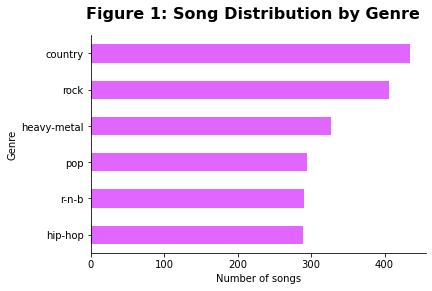

In [4]:
df_hp.genre.value_counts(ascending=True).plot.barh(color='#E066FF')
plt.suptitle('Figure 1: Song Distribution by Genre',
             fontsize=16,
             fontweight='bold')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Number of songs')
ax.set_ylabel('Genre')
plt.show()

We were able to extract a total of 2,042 songs and lyrics. Looking at Figure 1, song counts for each genre range from around 290 to 430 songs.

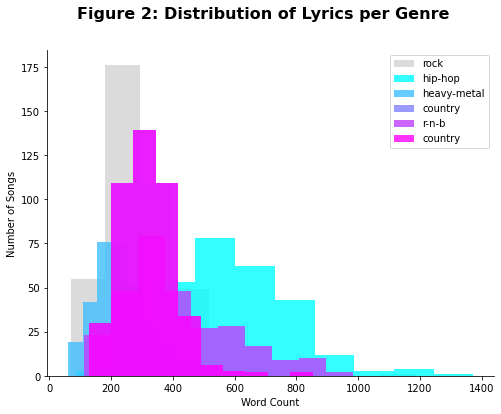

In [5]:
# length (count of words)/distribution of lyrics per genre
from nltk.tokenize import RegexpTokenizer
from collections import Counter

GENRES = ['rock', 'hip-hop', 'heavy-metal', 'country', 'r-n-b', 'country']
#GENRES = np.unique(df_hp.genre)
tokenizer = RegexpTokenizer(r'\w+')
COLORS = ['lightgray', '#00ffff', '#40bfff', '#8080ff', '#bf40ff', '#ff00ff']
for genre, color in zip(GENRES, COLORS):
    df_hp[df_hp.genre
          == genre].lyrics.apply(lambda x:
                                 len(tokenizer.tokenize(x))).hist(label=genre,
                                                                  color=color,
                                                                  figsize=(
                                                                      8, 6),
                                                                  alpha=0.8)

plt.legend()
plt.grid(b=None)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Word Count')
ax.set_ylabel('Number of Songs')
plt.suptitle('Figure 2: Distribution of Lyrics per Genre',
             fontweight='bold',
             fontsize=16)
plt.show()

Figure 2 shows the distribution of word count for each genre. Hiphop songs are the wordiest songs at its extreme and on average. Rock songs have the fewest unique words on average with usually just above 200 unique words.

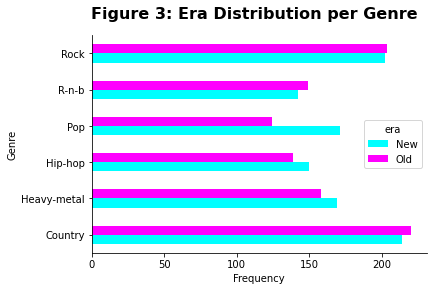

In [6]:
# old vs new
genre_counts = pd.crosstab(df_hp['genre'], df_hp['era'])
genre_counts.index = genre_counts.index.str.capitalize()
genre_counts.columns = genre_counts.columns.str.capitalize()
ax = genre_counts.plot.barh(cmap=cm.cool)
ax.set_xlabel('Frequency')
ax.set_ylabel('Genre')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.suptitle('Figure 3: Era Distribution per Genre',
             fontweight='bold',
             fontsize=16)
plt.show()

We further analyze the evolution of song lyrics over time by tagging songs as old (around 1990s) and new (around 2020s). Based on Figure 3, most genres have roughly the same song count except for pop that have more modern songs that old ones.

### Rock

Rock originated as Rock and Roll in the 1940s and 1950s with a style heavily influenced by African-American music and Country music. It has now evolved into a genre that encompasses a wide range of musical styles as reflected in its multiple sub-genres. It is characterized mainly by the sound of an electric guitar, along with a strong bass line and energetic rhythms.

In [7]:
df_rk = df_hp[df_hp.genre == 'rock'].copy()

In [8]:
data = Preprocess(df_rk, 'rock')

100%|██████████| 406/406 [00:00<00:00, 1387.22it/s]


In [9]:
df_bow_wc = data.tfidf.copy()

In [10]:
res_mean = cluster_range(df_bow_wc.to_numpy(),
                         KMeans(random_state=0),
                         2, 11)

100%|██████████| 10/10 [04:08<00:00, 24.88s/it]


In [11]:
svd = TruncatedSVD(n_components=2, random_state=1337)
X_new = svd.fit_transform(df_bow_wc.to_numpy())

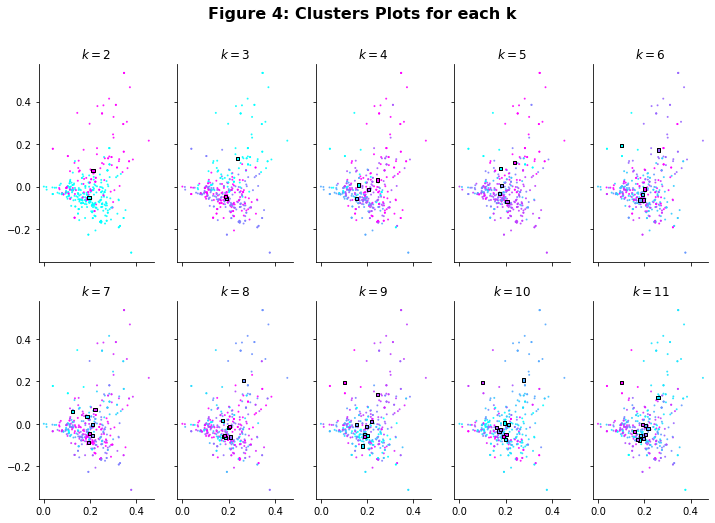

In [12]:
plot_clusters(X_new, res_mean['ys'], res_mean['centers'], svd)
plt.suptitle('Figure 4: Clusters Plots for each k',
             fontsize=16,
             fontweight='bold')
plt.show()

##### Choosing the number of clusters
For Rock, six clusters were chosen based on the internal validation scores. At k=6, Calinski-Harabasz, Silhouette score, and gap statistic are at their local maxima.

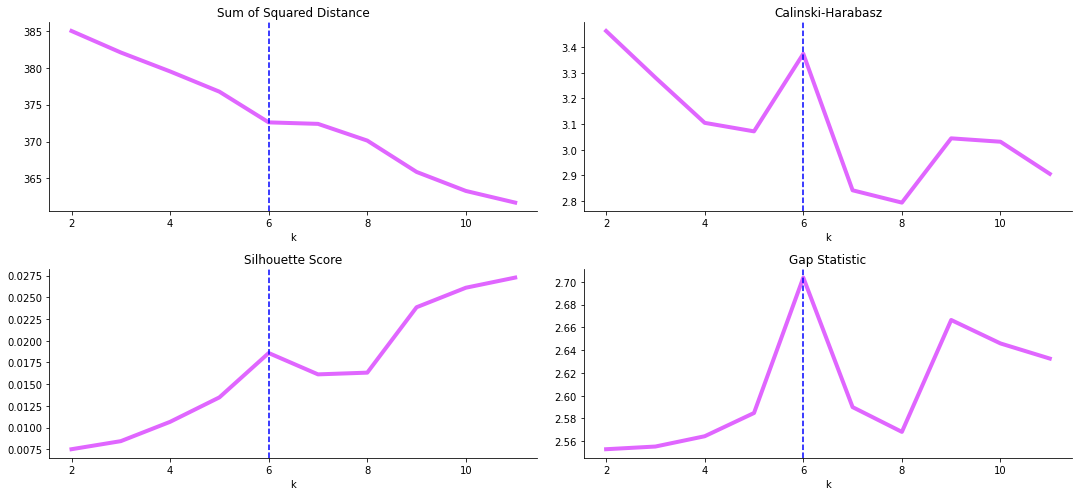

In [13]:
display(HTML(f'''<h3 style="text-align:center">
                Figure 5: Internal Validation Scores
                </h3>'''))
plot_internal(10, res_mean['inertias'], res_mean['chs'],
              res_mean['scs'], res_mean['gss'], 6)

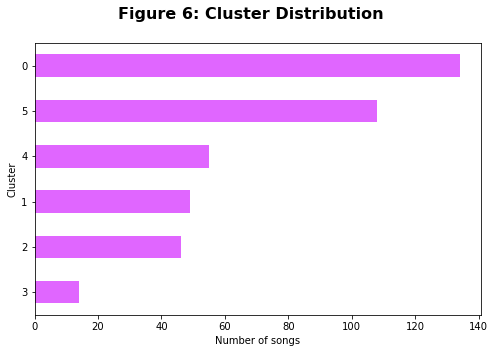

In [14]:
plt.rcParams["figure.figsize"] = (8, 5)
df_rk_cl, y = clusters(df_bow_wc, 6)
cl_count = pd.Series(y).value_counts(ascending=True)
cl_count.plot.barh(color='#E066FF')
plt.ylabel('Cluster')
plt.xlabel('Number of songs')
plt.suptitle('Figure 6: Cluster Distribution',
             fontsize=16,
             fontweight='bold')
plt.show()

### LSA

In [15]:
lsa_dct = lsa(y, df_rk_cl)

100%|██████████| 6/6 [00:15<00:00,  2.61s/it]


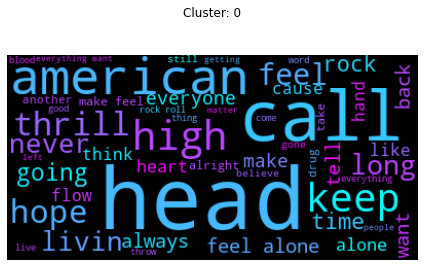

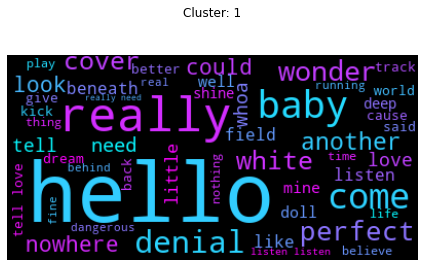

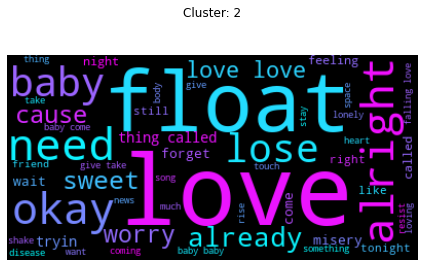

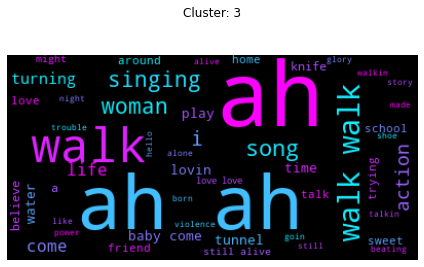

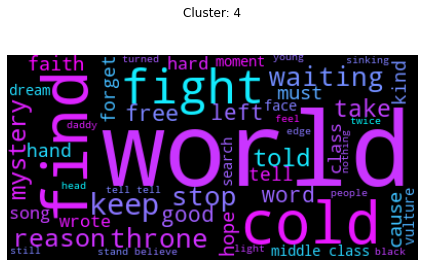

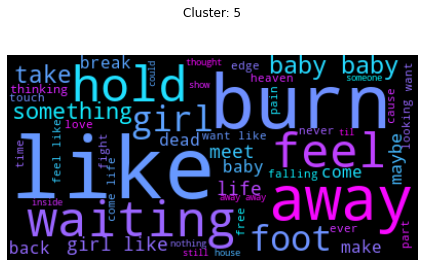

In [16]:
display(HTML(f'''<h3 style="text-align:center">
                Figure 7: Rock Word Clouds
                </h3>'''))
lsa_word_cloud(lsa_dct, df_rk_cl)

##### Cluster Labels
Rock is one diverse bunch. One group makes you feel like you’re on cloud 9, while another is random and psychedelic. A couple of groups are more controversial, with themes like anti-establishment and rebellion.

- <b>Cluster 0 - Anti Patriotism</b> - This cluster representing the most number of songs is filled with words that talks about the liberty of American people with words such as <b>American, thrill, drug</b> and <b>alone</b>. The top artists in this cluster mostly came from old era such as Green Day, Linkin Park and Nirvana with songs like "American Idiot", "Smells like Teen Spirit", and "Numb".


- <b>Cluster 1 - Psychedelic Experience</b> - This cluster is showing some altered state of consciousness with words such as <b>dream, nowhere</b>, and <b>denial</b>. Top artists found in this cluster are Red Hot Chilli Peppers and Sum 41 with songs like "Californication" and "Into the Deep".


- <b>Cluster 2 - Cloud 9</b> - Unlike the previous clusters, this cluster talks about love, feeling of extreme happiness with words appearing such as <b>love, float, baby</b>, and <b>sweet</b>. The popular artists in this cluster are some of the all time legends such as Aerosmith and Bon Jovi. 


- <b>Cluster 3 - Survival </b> - We can see appearance of words like <b>life, still alive,</b> and <b>time</b>. The lyrics mainly talk about trying to stay afloat amidst of all the challenges that life brings. Sample songs included in this cluster are "Walk of Life" and "Let Me live/Let Me Die". 


- <b>Cluster 4 - Rebellion</b> - This cluster is filled with words that refer to insurgence like <b>fight, stop</b> and <b>throne</b>. Some songs in this cluster include "Who Do You Trust?" and "I Will Not Bow" with a general theme of trusting only your own self and treating others as enemies.


- <b>Cluster 5 - Passion</b> - Similar to cluster 2, we see a lot of passion and feelings in this cluster with words such as <b>hold, touch, burn</b>, and <b>feel</b>. Samples of the songs in this cluster came from Nirvana with songs like "Come As You Are" and "About a Girl".

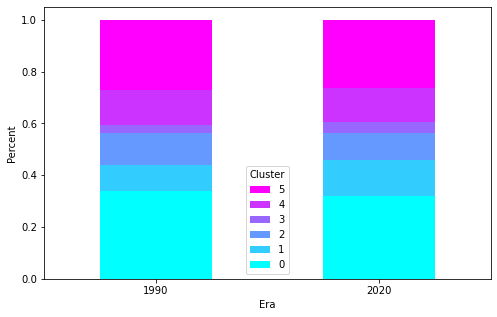

In [17]:
plt.rcParams["figure.figsize"] = (8, 5)
display(HTML(f'''<h3 style="text-align:center">
                Figure 8: Evolution of 30 years
                </h3>'''))
over_time(df_rk, df_rk_cl.cluster)

<p style="text-align:justify">There were barely any changes in the rock genre over the years. We only observed a slight decrease in the songs released under the Cloud 9 cluster and a slight increase in the songs under the Psychedelic cluster. Interestingly, both themes give the feeling of being in another dimension. However, Cloud 9 leans more towards elation while Psychedelic is drug-induced, forming disturbing hallucinations.</p>

### Pop

Pop is the genre of music whose songs sell the most copies and are often listed in hit charts. The genre is characterized as having a good rhythm, a catchy melody, and a repetitive chorus. Apart from these audio characteristics, it will be interesting to see the underlying themes in the song lyrics of this genre that most likely contribute to its commercial success.

In [18]:
df_pp = df_hp[df_hp.genre == 'pop'].copy()

In [19]:
data = Preprocess(df_pp, 'pop')

100%|██████████| 295/295 [00:00<00:00, 961.44it/s] 


In [20]:
df_bow_wc = data.tfidf.copy()

In [21]:
res_mean = cluster_range(df_bow_wc.to_numpy(),
                         KMeans(random_state=0),
                         2, 11)

100%|██████████| 10/10 [04:47<00:00, 28.76s/it]


In [22]:
svd = TruncatedSVD(n_components=2, random_state=1337)
X_new = svd.fit_transform(df_bow_wc.to_numpy())

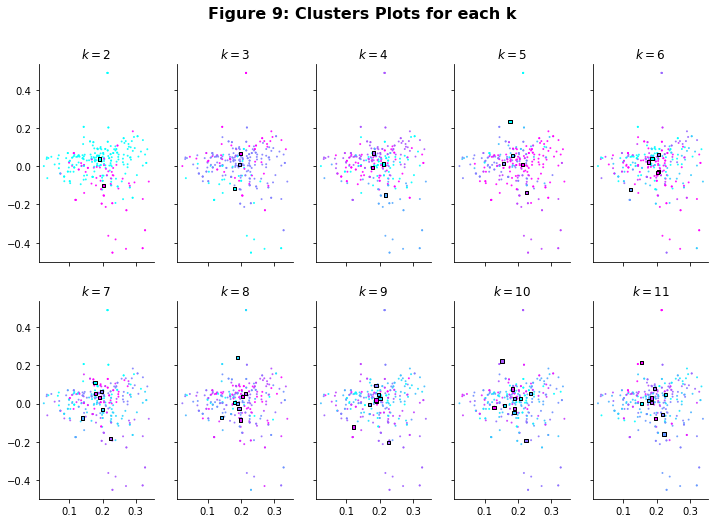

In [24]:
plot_clusters(X_new, res_mean['ys'], res_mean['centers'], svd)
plt.suptitle('Figure 9: Clusters Plots for each k',
             fontsize=16,
             fontweight='bold');

#### Choosing the number of clusters
For pop, six clusters were chosen based on the internal validation scores. At k=6, the Silhouette score and gap statistic are at thier local maxima.

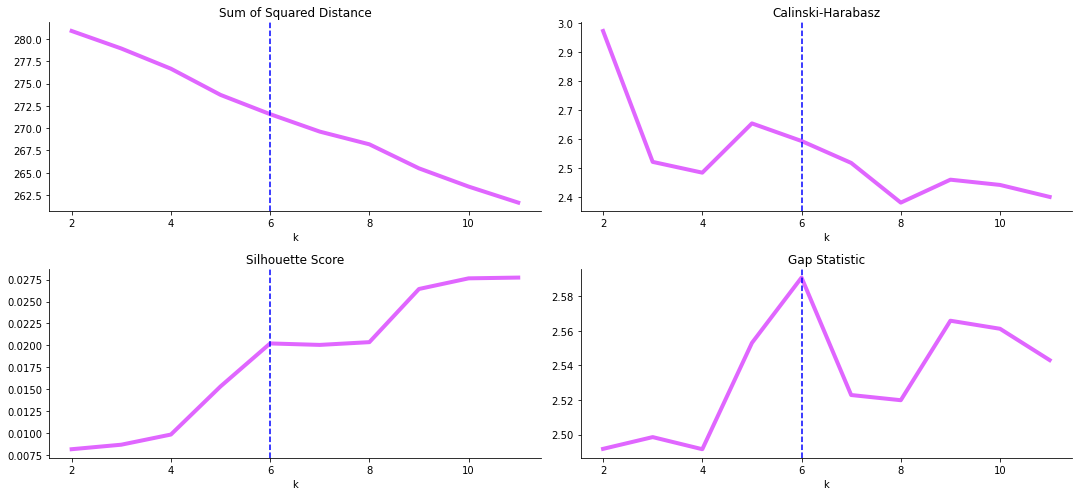

In [25]:
display(HTML(f'''<h3 style="text-align:center">
                Figure  10: Internal Validation Scores
                </h3>'''))
plot_internal(10, res_mean['inertias'], res_mean['chs'],
              res_mean['scs'], res_mean['gss'], 6);

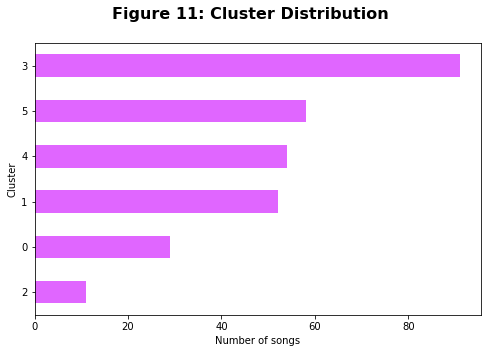

In [26]:
plt.rcParams["figure.figsize"] = (8, 5)
df_pp_cl, y = clusters(df_bow_wc, 6)
cl_count = pd.Series(y).value_counts(ascending=True)
cl_count.plot.barh(color='#E066FF')
plt.ylabel('Cluster')
plt.xlabel('Number of songs')
plt.suptitle('Figure 11: Cluster Distribution',
             fontsize=16,
             fontweight='bold');

### LSA

In [268]:
lsa_dct = lsa(y, df_pp_cl)

100%|██████████| 6/6 [00:26<00:00,  4.36s/it]


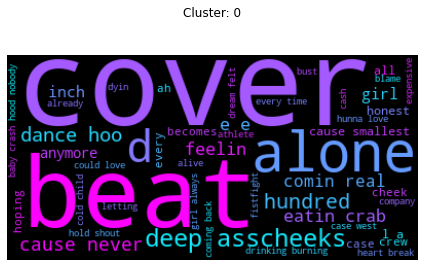

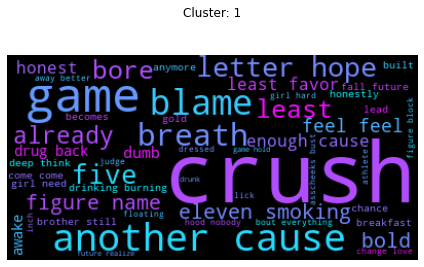

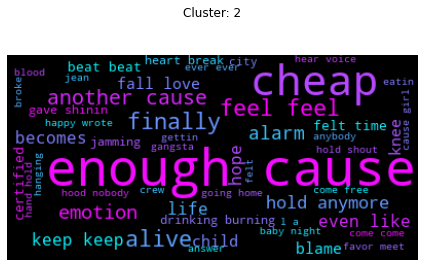

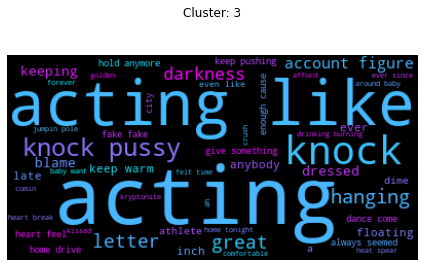

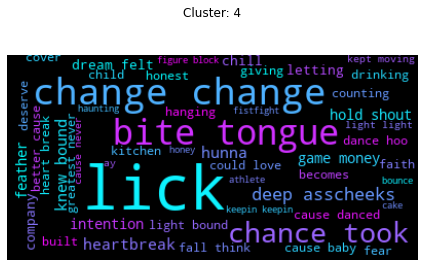

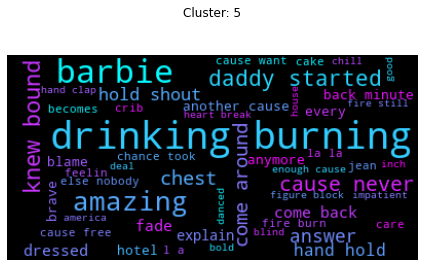

In [28]:
display(HTML(f'''<h3 style="text-align:center">
                Figure 12: Pop Word Clouds
                </h3>'''))
lsa_word_cloud(lsa_dct, df_pp_cl);

##### Cluster Labels
Pop songs are designed to appeal to the masses and as such, have the most relatable themes, including partying, love, and loss. It also has introspective themes that inspire us to rise over failures as well as jog our memories of times long gone. The themes we discovered are as follows:

- <b>Cluster 0 - Inspirational</b> - This cluster seems to send the message that in life, people often experience failures and challenges, but they should believe that light will be present at the end of the tunnel so they should strive to stand up on their feet again and continue on. This includes words like <b>beat, heart break, dyin, alive</b>, and <b>hoping</b>. Among the top songs included in this cluster are "Rise" by Katy Perry, "Waves" by Kanye West, and "Rock Bottom" by Hailee Steinfeld.


- <b>Cluster 1 - Sweet love</b> - This cluster is characterized by the sweet and gentle love that makes people's hearts flutter as characterized by words/phrases such as <b>crush, dressed, honest</b> and <b>letter</b>. Among the top songs included in this cluster are "Lover" by Taylor Swift and "This Girl" by Kungs.


- <b>Cluster 2 - Lonely hearts</b> - One of the phrases that stands out in the word cluster is <b>heart break city</b>. This phrase alone reflects why this cluster represents lyrics that are about people longing to be loved as further supported by other phrases like <b>hear voice, come come </b>, and the word, <b>leave hanging</b>. Top songs in this cluster include "Your Type" by Carly Rae Jepsen and "Hurt Me" by Meghan Trainor.


- <b>Cluster 3 - Memory Lane</b> - With words such as <b>felt time, comfortable</b>, and <b>home drive</b>, this cluster is characterized by lyrics reminiscing stories from the past that resonate with a person. Among the top songs included in this cluster are "I Have Questions" by Camila Cabello and "Always Remember Us This Way" by Lady Gaga.


- <b>Cluster 4 - Party</b> - As this genre is composed of hit songs, it comes as no surprise that the party theme is present as one of its clusters. This is reflected in words/phrases such as <b>danced, drinking, light, lick</b>, and <b>game money</b>. After all, don't we all want to have a good time at least every once in a while? Top songs in this cluster include "Sing" by Ed Sheeran and "Story of My Life" by One Direction


- <b>Cluster 5 - Mature love</b> - As a contrast to the sweet love cluster, this cluster contains lyrics conveying the more physical kind of love with words such as <b>chest, brave, fire burn, hotel</b>, and the phrase, <b>want nobody else</b>. Top songs in this cluster include "Hotline Bling" by Drake and "Bad Romance" by Lady Gaga.

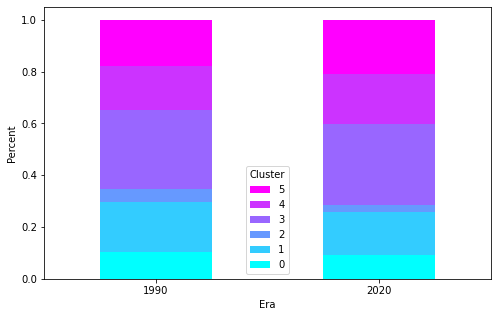

In [29]:
plt.rcParams["figure.figsize"] = (8, 5)
display(HTML(f'''<h3 style="text-align:center">
                Figure 13: Evolution of 30 years
                </h3>'''))
over_time(df_pp, df_pp_cl.cluster)

Over the years, we can see that themes for Pop song lyrics have shifted towards the adult stage with the increase in songs under the party and mature love clusters. This can be a result of society having become more liberated and open.

### Country

Country music is a style of American popular music that traced its origins in the rural areas of the South and West in the early 20th century.$^1$ Its style is largely string-accompanied and usually vocalized with simple form and harmony.$^2$


In [30]:
df_ct = df_hp[df_hp.genre == 'country'].copy()

In [31]:
data = Preprocess(df_ct, 'country')

100%|██████████| 434/434 [00:00<00:00, 1240.72it/s]


In [32]:
df_bow_wc = data.tfidf.copy()

In [33]:
res_mean = cluster_range(df_bow_wc.to_numpy(),
                         KMeans(random_state=0),
                         2, 11)

100%|██████████| 10/10 [04:36<00:00, 27.66s/it]


In [34]:
svd = TruncatedSVD(n_components=2, random_state=1337)
X_new = svd.fit_transform(df_bow_wc.to_numpy())

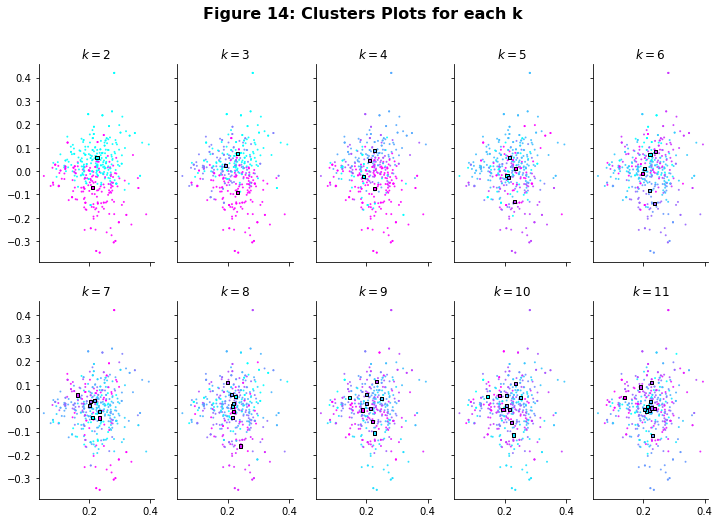

In [35]:
plot_clusters(X_new, res_mean['ys'], res_mean['centers'], svd)
plt.suptitle('Figure 14: Clusters Plots for each k',
             fontsize=16,
             fontweight='bold');

##### Choosing the number of clusters
<p style="text-align:justify">From Figure 15, we want our <code>Sum of Squared Distance</code> to be as small as possible, so it makes sense to select higher number of clusters. We want our <code>Calinski-Harabasz</code> and <code>Silhouette</code> scores to be higher for better cluster distinction. To obtain a balance among the various validation critera, we select our cluster to be equal to k = 6, where the <code>CHS</code> is at a local maxima.</p>

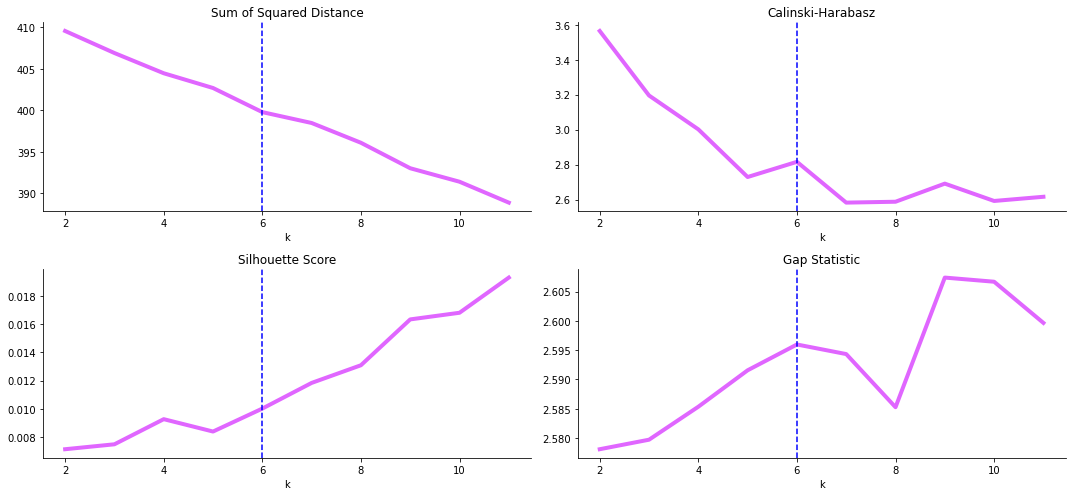

In [36]:
display(HTML(f'''<h3 style="text-align:center">
                Figure 15: Internal Validation Scores
                </h3>'''))
plot_internal(10, res_mean['inertias'], res_mean['chs'],
              res_mean['scs'], res_mean['gss'], 6);

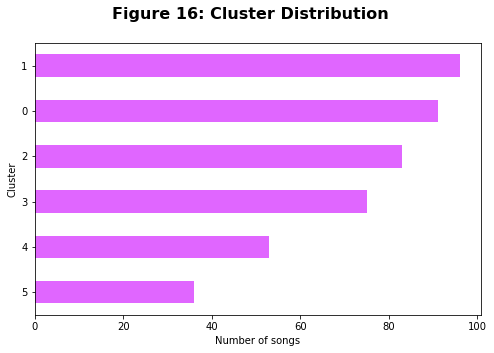

In [37]:
plt.rcParams["figure.figsize"] = (8, 5)
df_ct_cl, y = clusters(df_bow_wc, 6)
cl_count = pd.Series(y).value_counts(ascending=True)
cl_count.plot.barh(color='#E066FF')
plt.ylabel('Cluster')
plt.xlabel('Number of songs')
plt.suptitle('Figure 16: Cluster Distribution',
             fontsize=16,
             fontweight='bold');

### LSA

In [38]:
lsa_dct = lsa(y, df_ct_cl)

100%|██████████| 6/6 [00:20<00:00,  3.45s/it]


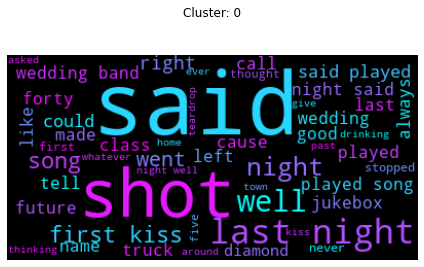

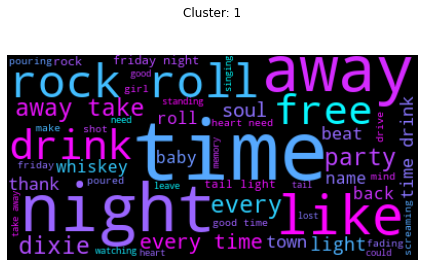

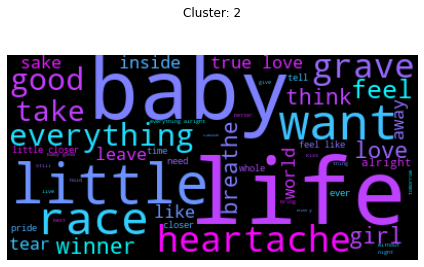

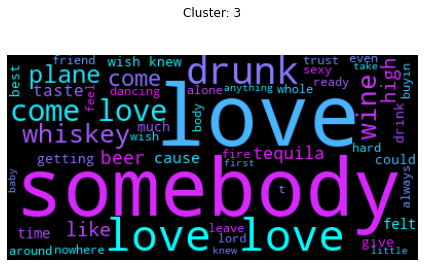

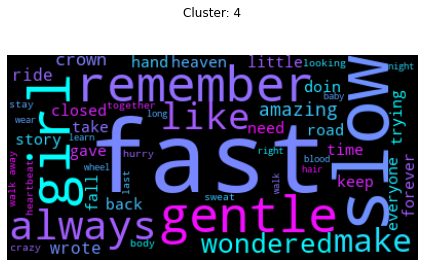

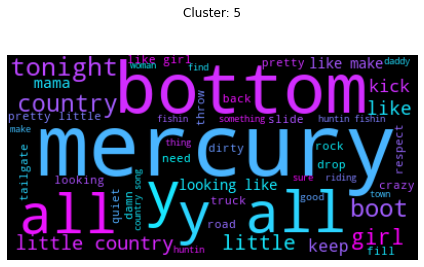

In [39]:
display(HTML(f'''<h3 style="text-align:center">
                Figure 17: Country Word Clouds
                </h3>'''))
lsa_word_cloud(lsa_dct, df_ct_cl);

##### Cluster Labels
The word clouds from Figure 17 above shows the prominent words that make up the lyrics for the six clusters created for country music, which are heavy dominated by topics about love, drinking and travelling.

- <b>Cluster 0 - Lifelong Love</b> - Cluster 0 describes longing for lifelong romance with phrases such as <b>wedding band</b> and <b>wedding diamond</b>. Songs in this cluster include "Would You Go With Me" and "Your Man" by Josh Turner.


- <b>Cluster 1 - Partying</b> - The next cluster talked about the partying lifestyle and doing activities like consuming copious amounts of alcohol, with terms like <b>whiskey</b>, while having a good time as described by the terms <b>party</b> and <b>friday night</b>. 


- <b>Cluster 2 - Uncompromising Love</b> - Cluster 2 is about demanding and uncompromising love as described by words like <b>want</b>, <b>evertyhing</b>, <b>life</b> and <b>world</b>. Top songs for this cluster include "Wish You Pain" by Andy Grammer


- <b>Cluster 3 - Intoxicated Love</b> - Cluster 3 is similar to cluster 1, with terms talking about love included. Songs in this cluster ranges from describing love as similar to feeling intoxicated on alcohol and to drinking to drown out the sorrows from heartache, with dominant phrases such as <b>love</b>, <b>drunk</b> and <b>whiskey</b>. One of the top songs within this cluster is "Drunk on a Plane" by Dierks Bentley


- <b>Cluster 4 - Cruising</b> - This cluster describes going on a road trip for short vacation or just having a laidback lifestyle in general. Top songs in this cluster include "The Weekend" by Brantley Gilbert


- <b>Cluster 5 - Escapade</b> - The last cluster is a bit similar to cluster 4 but mostly talks about escapism - whether escaping from one's problems or running away with a lover. Top song for this cluster is "Mercury Blues" by Alan Jackson.

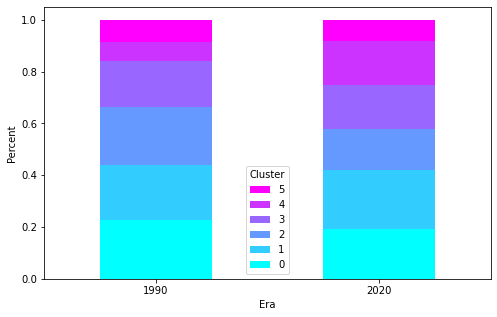

In [40]:
plt.rcParams["figure.figsize"] = (8, 5)
display(HTML(f'''<h3 style="text-align:center">
                Figure 18: Evolution of 30 years
                </h3>'''))
over_time(df_ct, df_ct_cl.cluster);

<p style="text-align:justify">There was slight increase within cluster 1 (Partying) which is in line with the overall shift of topics to pleasure-seeking activities. The large increase happened in cluster 4 which refers to a more relaxed and ladiback lifestyle.</p>

### Heavy Metal

Heavy metal is known for having heavy tunes, loud distorted guitars, energetic rhythms, dense bass-and-drum sound, and unrestrained vocals. They also tend to be highly lyrical, with dark vivid themes. It would be interesting to see the themes that can be extracted out of the genre.

In [41]:
df_hm = df_hp[df_hp.genre == 'heavy-metal'].copy()

In [42]:
data = Preprocess(df_hm, 'heavy-metal')

100%|██████████| 327/327 [00:00<00:00, 1535.87it/s]


In [43]:
df_bow_wc = data.tfidf.copy()

In [44]:
res_mean = cluster_range(df_bow_wc.to_numpy(),
                         KMeans(random_state=0),
                         2, 11)

100%|██████████| 10/10 [04:23<00:00, 26.36s/it]


In [45]:
svd = TruncatedSVD(n_components=2, random_state=1337)
X_new = svd.fit_transform(df_bow_wc.to_numpy())

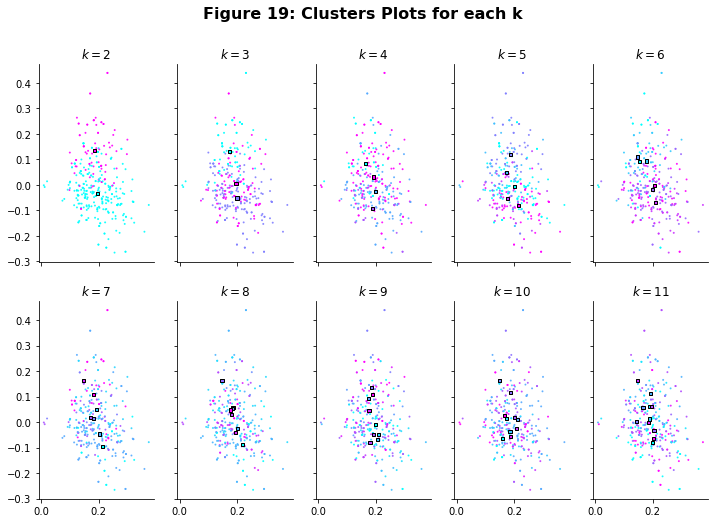

In [46]:
plot_clusters(X_new, res_mean['ys'], res_mean['centers'], svd)
plt.suptitle('Figure 19: Clusters Plots for each k',
             fontsize=16,
             fontweight='bold');

##### Choosing the number of clusters
For heavy metal, seven clusters were chosen based on the internal validation scores. At k=7, both Calinski-Harabasz and gap statistic are at their local maxima. Significant drops in scores can be seen on higher cluster counts. At this point, the Silhouette score is also near the local maxima.

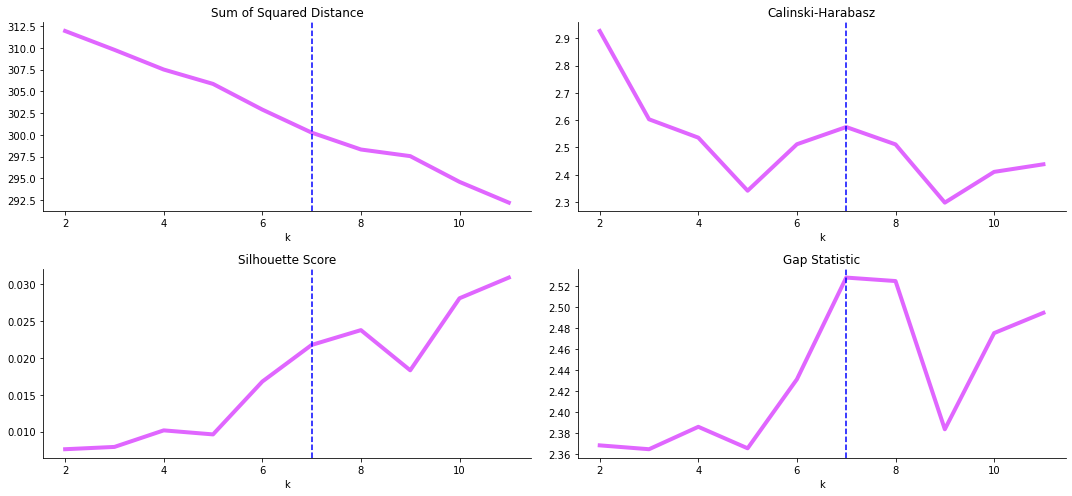

In [47]:
display(HTML(f'''<h3 style="text-align:center">
                Figure 20: Internal Validation Scores
                </h3>'''))
plot_internal(10, res_mean['inertias'], res_mean['chs'],
              res_mean['scs'], res_mean['gss'],7);

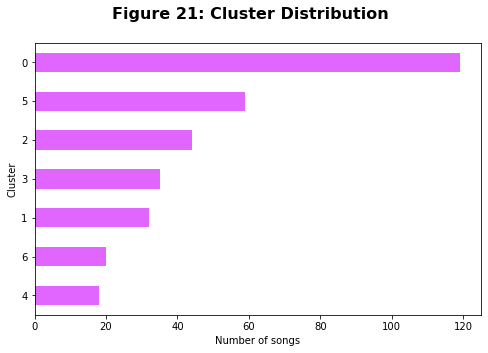

In [48]:
plt.rcParams["figure.figsize"] = (8, 5)
df_hm_cl, y = clusters(df_bow_wc, 7)
cl_count = pd.Series(y).value_counts(ascending=True)
cl_count.plot.barh(color='#E066FF')
plt.ylabel('Cluster')
plt.xlabel('Number of songs')
plt.suptitle('Figure 21: Cluster Distribution',
             fontsize=16,
             fontweight='bold');

### LSA

In [49]:
lsa_dct = lsa(y,df_hm_cl)

100%|██████████| 7/7 [00:18<00:00,  2.62s/it]


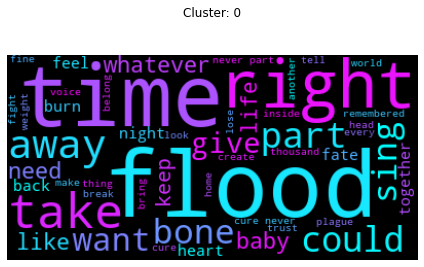

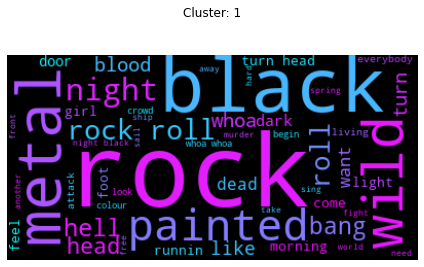

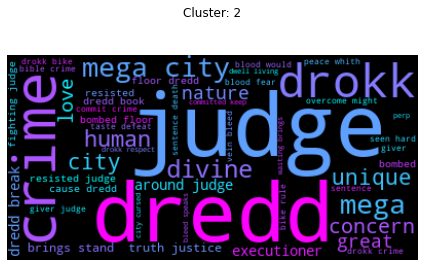

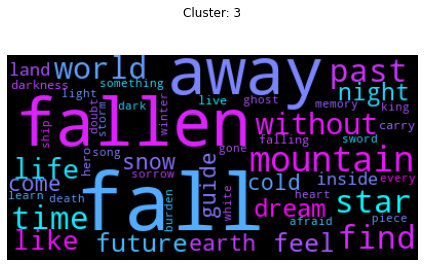

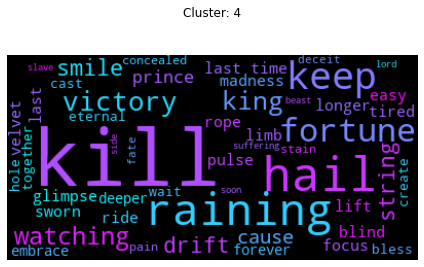

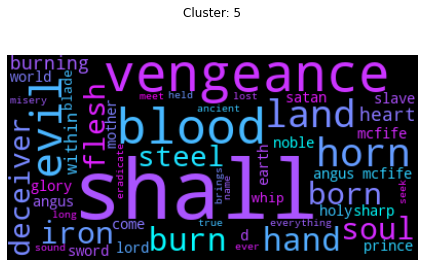

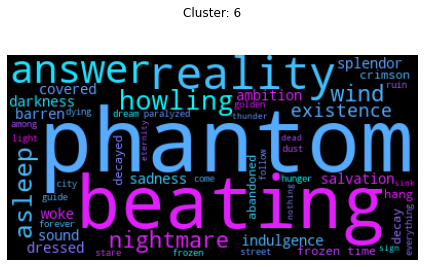

In [50]:
display(HTML(f'''<h3 style="text-align:center">
                Figure 22: Word Clouds
                </h3>'''))
lsa_word_cloud(lsa_dct, df_hm_cl);

##### Cluster Labels
As expected, heavy metal brought about themes that all paint dark vivid pictures. Among the themes we saw are:

- <b>Cluster 0 - Disasters & Tragedies</b> - This cluster representing the most number of songs is filled with words that can make one feel like the world is falling apart. This includes words like <b>flood, plague, bone</b> and <b>burn</b>. Among the top songs included in this cluster are classics like Guns n' Roses' "November Rain" and "For Whom the Bell Tolls". There are also newer titles like Kreator's "666 - World Divided" and Cannibal Corpse's "Inhumane Harvest".


- <b>Cluster 1 - Rock & Roll Lifestyle</b> - Instead of heavy darkness and grim themes, this cluster is a nod to heavy metal roots which is old classic Rock n' Roll. Among the most notable words refer to the Rock n roll lifestyle like <b>rock, black, painted, wild</b> and <b>metal</b>. Some notable songs in this cluster included Judas Priest's "Electric Eye", Airbourne's "Running Wild", and The Rolling Stone's "Paint it Black".


- <b>Cluster 2 - Dystopia</b> - Returning to dark themes, this cluster talks about a futuristic dystopian mega city filled with crime and chaos. Words like <b>crime, judge dredd, mega city</b> and <b>anarchy</b> occupy these songs. Songs in this cluster include Anthrax's "I am The Law", Cradle of Filth's "Right Wing of the Garden Triptych", and Rings of Saturn's "Natural Selection"


- <b>Cluster 3 - Failure</b> - Having words like <b>fallen, mountain</b> and <b>death</b>, this cluster appeals to something visceral and represents a feeling that everyone dreads - failure. Songs belonging to this cluster include extremely somber titles like Agalloch's "In the Shadow of Our Pale Companion", At The Gates' "Cold", Wintersun's "Land of Snow and Sorrow".


- <b>Cluster 4 - War</b> - This cluster is littered with words that refer to monarchy like <b>king, prince</b> and <b>fortune</b> while also having words like <b>kill, raining</b> and <b>victory</b> that all describe a difficult battle. Perhaps this refers to wars and winning at all costs. Some songs in this include Fleshgod Apocalypse's "Minotaur" which talks about a war against gods and Manowar's "Hail and Kill" which tells the experience of heading into a medieval battle.


- <b>Cluster 5 - Hell</b> - In a genre filled with darkness, it is no surprise that the theme of hell has its own dedicated cluster. Words like <b>horn, satan, burn, evil</b> and <b>burning</b> all paint a picture of a burning inferno. Songs in this cluster Behemoth's "Messe Noire" which is basically a prayer to the devil and Slipknot's "The Devil in I" which talks about restrained hellish feelings.



- <b>Cluster 6 - Nightmare</b> - Gloomy illusory words like <b>phantom, nightmare, howling</b> and <b>darkness</b> fill these songs, inducing the frightening feeling of a nightmare. Songs belonging to this cluster include At the Gates' "At War with Reality" which describes images of a dying city and Dark Tranquility's "Phantom Days" which seems to be a song about questioning reality.

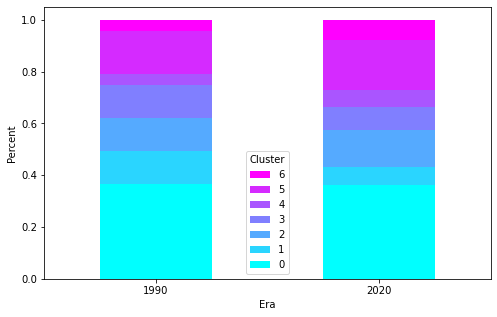

In [51]:
plt.rcParams["figure.figsize"] = (8, 5)
display(HTML(f'''<h3 style="text-align:center">
                Figure 23: Evolution of 30 years
                </h3>'''))
over_time(df_hm, df_hm_cl.cluster);

Above we can see how clusters for heavy metal have evolved in the past few decades. Overall, we can see a dramatic decrease in the share of rock-n-roll songs (Cluster 1), perhaps because it has gotten a little out of style these days. In its place, we see themes like hell and dystopia taking over. One possible reason for this rise is due to the ubiquity of a dystopian future in media with shows and movies like Black Mirror, Mad Max, and the Matrix gaining immense popularity. This may also be a reflection that our society has gotten more pessimistic as online media creates more and more content describing social issues for everyone's consumption.

### RnB

**Rythm and Blues** or **R&B** is a popular music originated in the African-American communities in the 1940s.  The bands in this genre usually consists of piano, guitars, bass, drums, and other wind instruments.  R&B themes usually reflects African-American experiences of pain, quest for freedom, joy, and relationships.

In [52]:
df_rb = df_hp[df_hp.genre == 'r-n-b'].copy()

In [53]:
data = Preprocess(df_rb, 'r-n-b')

100%|██████████| 291/291 [00:00<00:00, 945.70it/s]


In [54]:
df_bow_wc = data.tfidf.copy()

In [55]:
res_mean = cluster_range(df_bow_wc.to_numpy(),
                         KMeans(random_state=0),
                         2, 11)

100%|██████████| 10/10 [04:51<00:00, 29.14s/it]


In [56]:
svd = TruncatedSVD(n_components=2, random_state=1337)
X_new = svd.fit_transform(df_bow_wc.to_numpy())

Text(0.5, 0.98, 'Figure 24: Clusters Plots for each k')

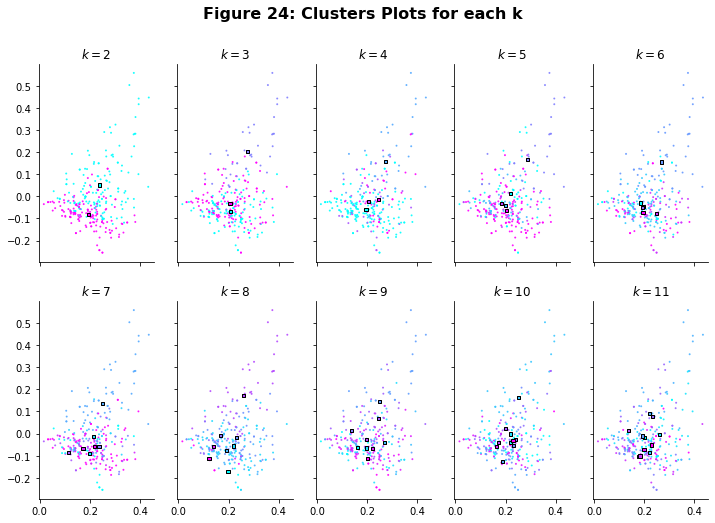

In [57]:
plot_clusters(X_new, res_mean['ys'], res_mean['centers'], svd)
plt.suptitle('Figure 24: Clusters Plots for each k',
             fontsize=16,
             fontweight='bold')

#### Choosing the number of clusters
For R&B, four clusters were chosen based on the internal validation scores. While not a local maxima, the Calinski-Harabasz at k=4 is at the elbow.  Which gives us a good balance of Silhouette score, gap statistic, and sum of squared distance.

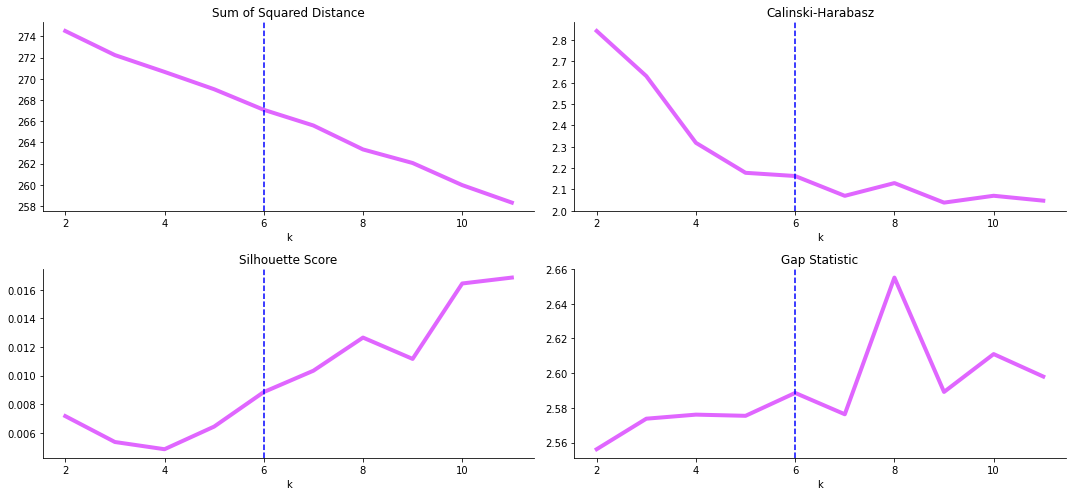

In [58]:
display(HTML(f'''<h3 style="text-align:center">
                Figure 25: Internal Validation Scores
                </h3>'''))
plot_internal(10, res_mean['inertias'], res_mean['chs'],
              res_mean['scs'], res_mean['gss'], 6)

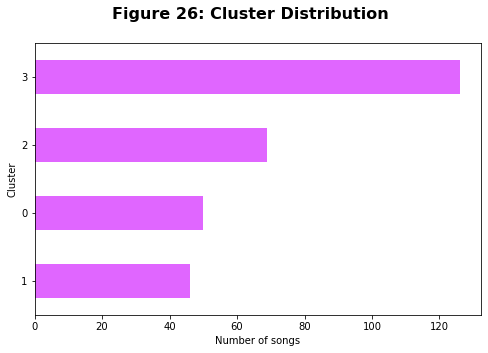

In [59]:
plt.rcParams["figure.figsize"] = (8, 5)
df_rb_cl, y = clusters(df_bow_wc, 4)
cl_count = pd.Series(y).value_counts(ascending=True)
cl_count.plot.barh(color='#E066FF')
plt.ylabel('Cluster')
plt.xlabel('Number of songs')
plt.suptitle('Figure 26: Cluster Distribution',
             fontsize=16,
             fontweight='bold');

### LSA

In [60]:
lsa_dct = lsa(y, df_rb_cl)

100%|██████████| 4/4 [00:16<00:00,  4.22s/it]


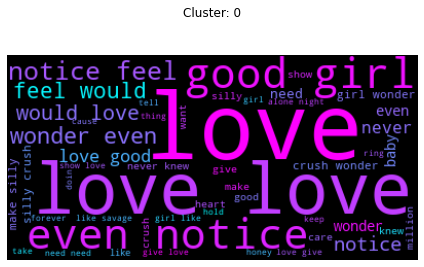

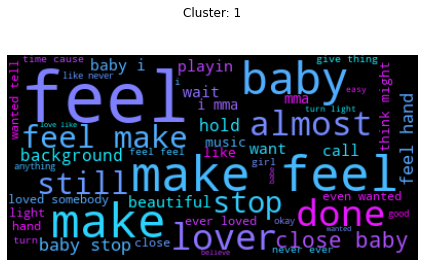

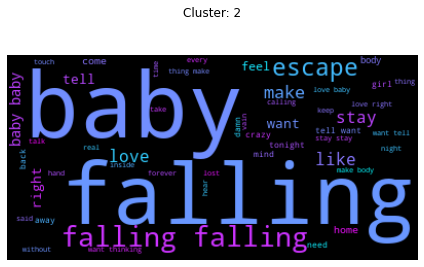

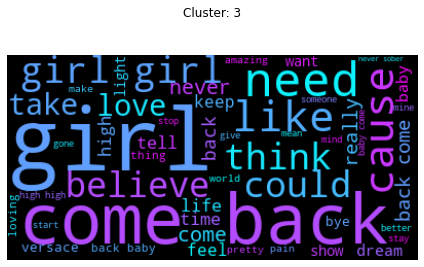

In [61]:
display(HTML(f'''<h3 style="text-align:center">
                Figure 27: Word Clouds
                </h3>'''))
lsa_word_cloud(lsa_dct, df_rb_cl);

#### Cluster Labels
As expected, heavy metal brought about themes that all paint dark vivid pictures. Among the themes we saw are:

- **Cluster 0 - Infatuation** - This cluster talks about how it things could be if the the person you're in love with reciprocates your feelings.  It's mostly about wondering and what-ifs in hopes that things go as what we wanted.  Song's in this cluster include "Level-up" by Ciara and "New Balance" by Jhene Aiko. 
- **Cluster 1 - Feelings** - This cluster talks more about the way love makes people feel jittery inside.  In a way it talks about this "butterfly in your stomach" when you feel in love.  This cluster has the lowest count of songs in this genre.  Songs in this cluster include "You" by Jacquees and "Motivation" by Kelly Rowland.  
- **Cluster 2 - Escape in Love** - This cluster talks about falling in love, and how it would be nice to escape the world with the person you're in love with.  Songs in this cluster include "At your Best" by Aaliyah and "Crazy in Love" by Beyonce.  
- **Cluster 3 - Longing** - This cluster represents the most number of songs in the genre.  With words mostly about "the girl coming back" followed by something about "I think because I need", the songs try to reach the girl that's probably gone for a while now.  Songs in this cluster include "Every time I close my eyes" by Babyface and "Window Seat" by Erykah Badu.

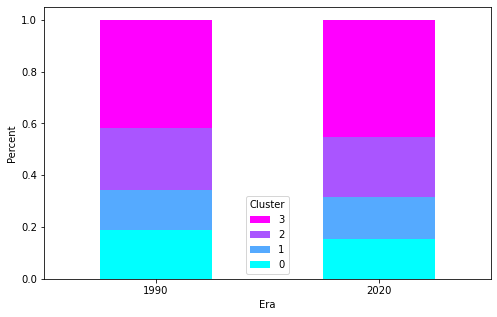

In [62]:
plt.rcParams["figure.figsize"] = (8, 5)
display(HTML(f'''<h3 style="text-align:center">
                Figure 28: Evolution of 30 years
                </h3>'''))
over_time(df_rb, df_rb_cl.cluster);

Above we can see how clusters for R&B had minimal changes in the past few decades with the exception of cluster 3 which is about longing. One possible reason for this is that it's easier for people to connect in recent times while they are a distance apart, which can reignite feelings despite the fact that lovers are not within physical reach to each other.

### Hip-hop

Hiphop, also known as rap music, is a genre of popular music developed in the United States by inner-city African Americans and Latino Americans in the Bronx borough of New York City in the 1970s. It consists of a stylized rhythmic music that commonly accompanies rapping or chanted rhythmic and rhyming speech.

In [22]:
df_hh = df_hp[df_hp.genre == 'hip-hop'].copy()

In [23]:
data = Preprocess(df_hh, 'hip-hop')

100%|██████████| 289/289 [00:00<00:00, 594.15it/s]


In [24]:
df_bow_wc = data.tfidf.copy()

In [25]:
res_mean = cluster_range(df_bow_wc.to_numpy(),
                         KMeans(random_state=0),
                         2, 11)

100%|██████████| 10/10 [05:36<00:00, 33.68s/it]


In [26]:
svd = TruncatedSVD(n_components=2, random_state=1337)
X_new = svd.fit_transform(df_bow_wc.to_numpy())

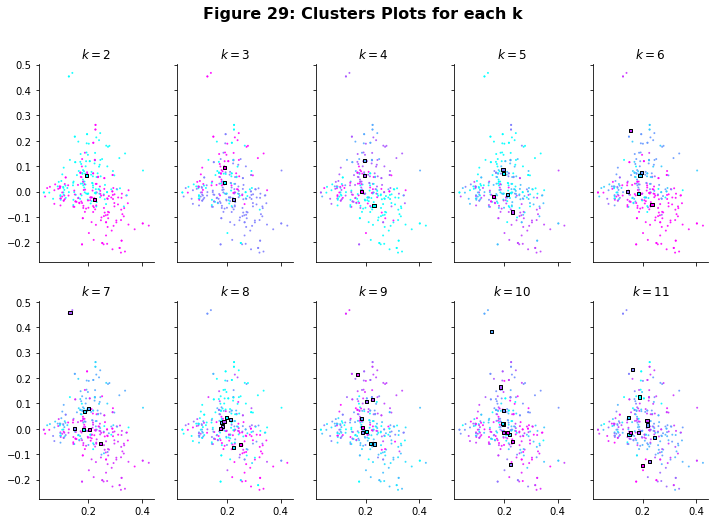

In [27]:
plot_clusters(X_new, res_mean['ys'], res_mean['centers'], svd);
plt.suptitle('Figure 29: Clusters Plots for each k',
             fontsize=16,
             fontweight='bold');

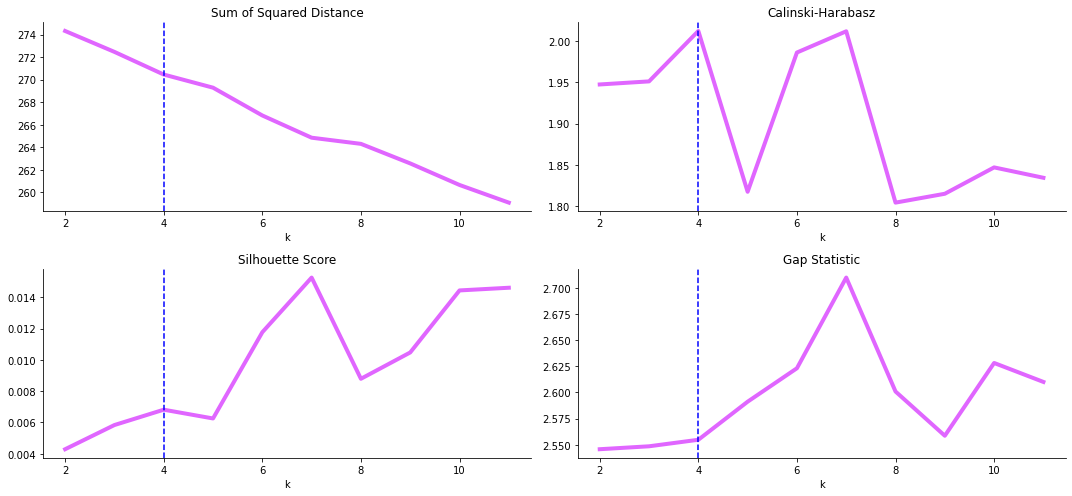

In [28]:
display(HTML(f'''<h3 style="text-align:center">
                Figure 30: Internal Validation Scores
                </h3>'''))
plot_internal(10, res_mean['inertias'], res_mean['chs'],
              res_mean['scs'], res_mean['gss'],4);

##### Choosing the number of clusters
The mapping of songs cluster on the two most frequent words does not show clear distinction between clusters. We therefore look at the internal validation scores to choose an appropriate k. Based on Calinski-Harabasz score and initial assessment of latent factor word clouds.

### LSA

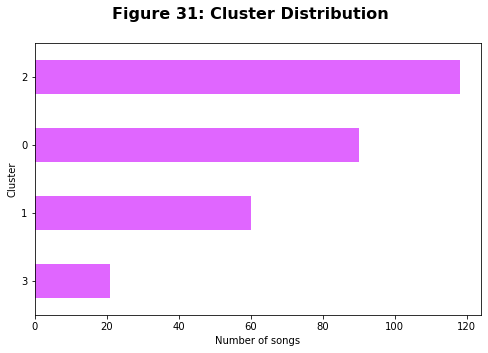

In [29]:
plt.rcParams["figure.figsize"] = (8, 5)
df_hh_cl, y = clusters(df_bow_wc, 4)
cl_count = pd.Series(y).value_counts(ascending=True)
cl_count.plot.barh(color='#E066FF')
plt.ylabel('Cluster')
plt.xlabel('Number of songs')
plt.suptitle('Figure 31: Cluster Distribution',
             fontsize=16,
             fontweight='bold');

Figure 31 shows the number of songs that belong to each cluster. Further analysis of this chart will be discussed in their respective word clouds.

In [30]:
lsa_dct = lsa(y,df_hh_cl)

100%|██████████| 4/4 [00:27<00:00,  6.86s/it]


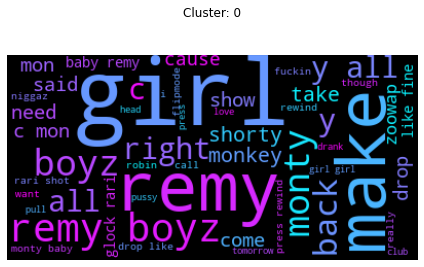

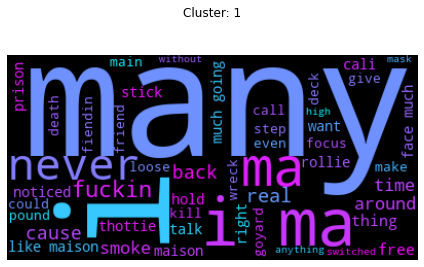

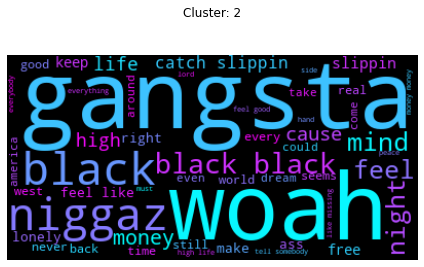

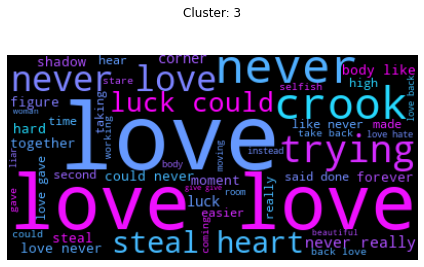

In [31]:
display(HTML(f'''<h3 style="text-align:center">
                Figure 32: Word Clouds
                </h3>'''))
lsa_word_cloud(lsa_dct, df_hh_cl);

##### Cluster Labels
- <b>Cluster 0 - The Hood</b> - This cluster is about the boys in the hood. Songs in these cluster talk about the tight bonds of brotherhood and friendship with the words like <b>remy, monty and boyz</b> which refer to their fellow rappers. Songs in this cluster include 98 freestyle by "Big I" and "679" by Fetty Wap.

- <b>Cluster 1- Get Rich - </b> This cluster has the lowest cluster membership. Songs in these cluster talk about getting rich with references to <b>Rolex watches (rollies), diamonds and money</b>. Songs in this cluster include Childish Gambino's "This is America" and Beastie Boys' "Brass Monkey".

- <b>Cluster 2 - Gangsta - </b> Cluster 1 has the highest cluster membership. Songs in these cluster talk about the gangster life with words like <b>gangsta, niggaz, street, night and even death</b>. This cluster is about the culture and values typical of American street gangs and street hustlers with songs like "The Crossroads" by Bone Thugs-n-Harmony and "Damn it feels good to be a gangsta" by Geto Boys.

- <b>Cluster 3 - Some Lovin' - </b> As with other genres, songs in this cluster talk about love. This version however is a very mature approach talking about <b>stealing hearts and ass</b>. Songs in this cluster include "Roxanne" by Arizona Zervas and "Teenage Fever" by Drake.

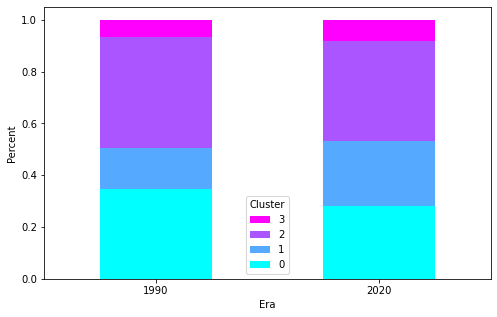

In [32]:
plt.rcParams["figure.figsize"] = (8, 5)
display(HTML(f'''<h3 style="text-align:center">
                Figure 33: Evolution over 30 years
                </h3>'''))
over_time(df_hh, df_hh_cl.cluster);

Over 30 years, hiphop songs have evolved to be less about the gangster life and more about getting some loving and some money.

The dominant topic around the 90s was ‘Gangsta’ life which is about altercations between gangs or against the police or the famous West Coast vs. East Coast rivalry. However after the 90s, we observed more songs about ‘money' and 'love' possibly due to the decline  in the commercial viability of gangter rap with the rise of alternative 'softer' hiphop.

## V. Conclusion

<p style="text-align:justify">The songs clusters give us a couple of good insights. First is that audio and lyrical compositions tell many different kinds of stories, but we noticed that they gravitated towards the common themes of partying, pleasure, sorrow, and love. Second, it appears that lyrics do reflect the prevalent cultural and social situation at the time the song was written. And finally, with the analysis of clusters over time, we observed that song lyrics nowadays trend towards more mature and hedonistic themes. We believe this is because the society in general has become more open in discussing topics which were deemed taboo in the past such as alcohol, drugs, and other vices.
<br><br>For the prevailing themes, these are somehow gives character to the genres as these themes don't normally cross genres with exception of the common ones. For example, it is noticable that from the themes, heavy metal tend to excude a dark vibe.
<br><br>For the lyrics that reflect the prevalent cultural and social situation, it is reflected in the changes of the cluster count over the past 30 years. This shows have the songwriters and singers percieve and experience those changes.
<br><br>Then for the opennes of the lyrics to put mature and hedonistic themes, it is quite obvious that the society nowadays are more accepting in discussing topics that are deemed to be tabboo or awkward in the past decades.
<br><br>With these insights, we can see the society percieves and accepts the situation, whether it's a cultural norm or an event, or even everyday things.</p>

## VI. Recommendation

<p style="text-align:justify">Our analysis and assumptions of the latent factors were guided by the known contexts of cluster genres. However, it would be recommended if the study can be improved by taking into account figures of speech.
<br><br>Most people enjoy music not just because of the audio components, but also because of the message conveyed. This is a way of looking under the hood and understanding why we like songs from a genre or artist that we are not usual a fan of, or why we do not necessarily have a go-to genre. At a personal level, if we socialize or host gatherings, knowing these themes can help us build up the playlist we want to play.
<br><br>Apart from recommender systems, this study can help businesses like cafes or bars easily create playlists that suit the mood of their place's ambience or their target customers.
<br><br>For songwriters, the study can help them discover what other genres they can explore or how they can create something new or fresh in their existing genres.
<br><br>Another useful application of this study comes in the form of music therapy for mental disorders. When music therapists prepare for their sessions with patients, they need to spend a significant amount of time researching and carefully analyzing songs in terms of audio features and lyrics to make sure that they select appropriate songs. Studies like this can save them a lot of time and effort to focus on other important tasks instead.$^5$</p>

## References

[1] Company, Houghton Mifflin Harcourt Publishing. "The American Heritage Dictionary entry: Music". ahdictionary.com. Retrieved 2021-01-20.

[2] Wiktionary. *lyric*. https://en.wiktionary.org/wiki/lyric

[3] Deep Gold Band (2011). "Why Lyrics Matter." invisibleoranges.com https://www.invisibleoranges.com/why-lyrics-matter/

[4] Deep Gold Band (2018). "What is More Important in a Song - Music or Lyrics". medium.com https://medium.com/@deepgoldband.com/what-is-more-important-in-a-song-lyrics-or-music-ec39cf94b9d7

[5] Georgia's Public Liberal Arts University. Lyric Analysis: A Resource for Acute Psychiatric Music Therapists. https://kb.gcsu.edu/mtt/2/?utm_source=kb.gcsu.edu%2Fmtt%2F2&utm_medium=PDF&utm_campaign=PDFCoverPages